In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/1 Land Prices/model_data/Zensus_Berlin_Value.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 188 entries, Neighborhood_FID to City_Name
dtypes: float64(1), int64(185), object(2)
memory usage: 142.6+ KB


In [62]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Area_Types", "City_Name", "Area_Count", "Land_Value"])
y = df["Land_Value"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=1)

In [58]:
print(X)
print(y)

    Neighborhood_FID  buildings_total_units  n_occupied_by_owner   
0                  1                  51235                    0  \
1                  2                  41010                    0   
2                  3                   3667                    0   
3                  4                   8288                    0   
4                  5                  44044                    0   
..               ...                    ...                  ...   
92                92                   5180                    0   
93                93                   2080                    0   
94                94                  11820                    0   
95                95                  17213                    0   
96                96                   3976                    0   

    n_ownership_with_current_household  n_owned_without_current_household   
0                                 3862                                 29  \
1                            

In [59]:
from sklearn.linear_model import RidgeCV

In [64]:
model = RidgeCV()
model.fit(X_train, y_train)

RidgeCV()

In [65]:
print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9999999999999564
model score on testing data: -2.523853660586458


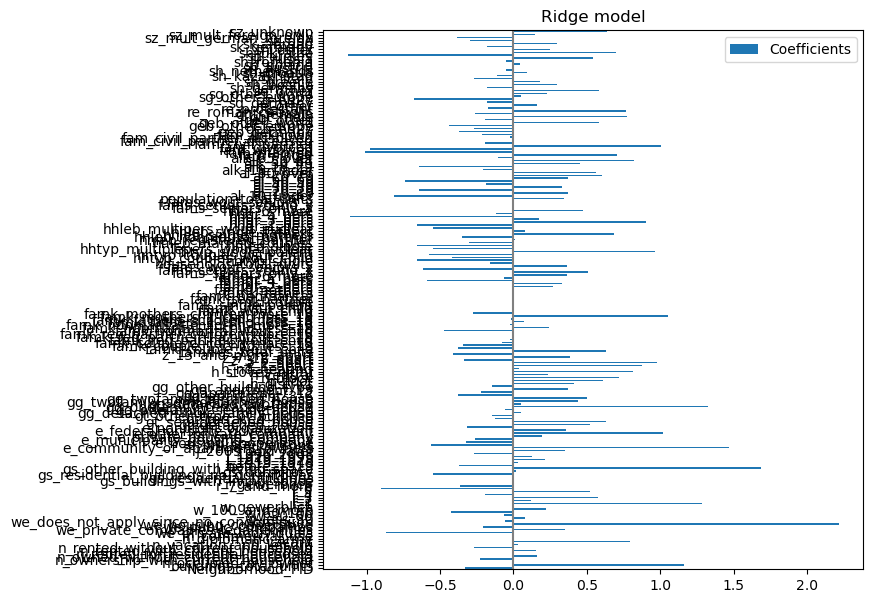

In [66]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [42]:
from sklearn import preprocessing
from sklearn import utils

In [46]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [47]:
model = LogisticRegression(solver='liblinear')
model.fit(X, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [97, 64]